In [2]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 7.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 9.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [cartopy]m2/4 [pyproj]


Starting ISS tracking. Collecting approximately 100 data points...
Point 1/100: Lat: 29.09, Long: 145.81
Point 2/100: Lat: 29.59, Long: 146.34
Point 3/100: Lat: 30.09, Long: 146.88
Point 4/100: Lat: 30.58, Long: 147.43
Point 5/100: Lat: 31.08, Long: 147.98
Point 6/100: Lat: 31.57, Long: 148.53
Point 7/100: Lat: 32.06, Long: 149.10
Point 8/100: Lat: 32.59, Long: 149.72
Point 9/100: Lat: 33.07, Long: 150.30
Point 10/100: Lat: 33.59, Long: 150.94
Point 11/100: Lat: 34.07, Long: 151.53
Point 12/100: Lat: 34.54, Long: 152.13
Point 13/100: Lat: 35.01, Long: 152.73
Point 14/100: Lat: 35.47, Long: 153.35
Point 15/100: Lat: 35.97, Long: 154.02
Point 16/100: Lat: 36.43, Long: 154.65
Point 17/100: Lat: 36.89, Long: 155.29
Point 18/100: Lat: 37.37, Long: 155.99
Point 19/100: Lat: 37.82, Long: 156.65
Point 20/100: Lat: 38.26, Long: 157.31
Point 21/100: Lat: 38.70, Long: 157.98
Point 22/100: Lat: 39.13, Long: 158.66
Point 23/100: Lat: 39.59, Long: 159.42
Point 24/100: Lat: 40.01, Long: 160.11
Point 

/opt/anaconda3/lib/python3.13/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


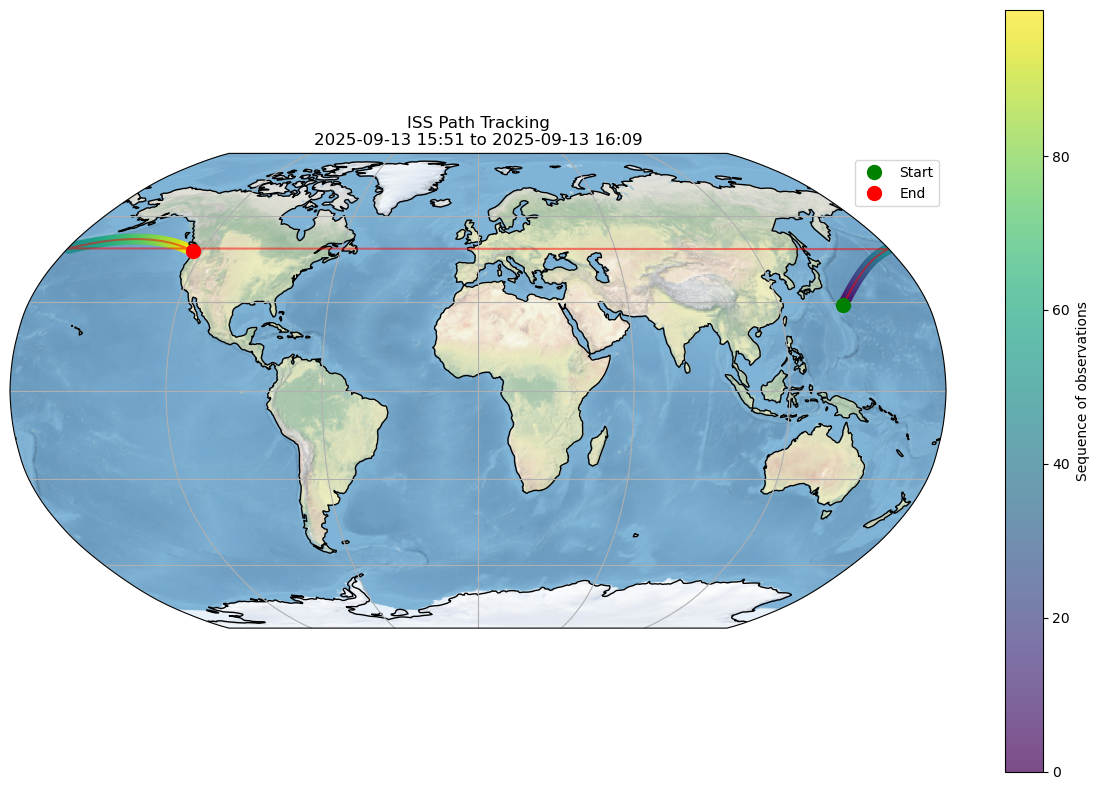


Tracking Summary:
Total points collected: 100
Time period: 2025-09-13 15:51:14 to 2025-09-13 16:09:48
Duration: 18.6 minutes
Average altitude: 421.06 km
Average velocity: 27590.74 km/h


In [3]:
import requests
import matplotlib.pyplot as plt
import time
import pandas as pd
from datetime import datetime
import cartopy.crs as ccrs
import numpy as np

def get_iss_location():
    response = requests.get("https://api.wheretheiss.at/v1/satellites/25544")
    data = response.json()
    return {
        'latitude': data['latitude'],
        'longitude': data['longitude'],
        'timestamp': data['timestamp'],
        'altitude': data['altitude'],
        'velocity': data['velocity']
    }

print("Starting ISS tracking. Collecting approximately 100 data points...")
iss_data = []
num_points = 100

for i in range(num_points):
    try:
        location = get_iss_location()
        iss_data.append(location)
        print(f"Point {i+1}/{num_points}: Lat: {location['latitude']:.2f}, Long: {location['longitude']:.2f}")
        
        if i < num_points - 1:
            time.sleep(10)  
            
    except Exception as e:
        print(f"Error fetching data: {e}")
        time.sleep(2)  

df = pd.DataFrame(iss_data)

df['datetime'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.Robinson())

ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.scatter(
    df['longitude'], 
    df['latitude'],
    c=range(len(df)),  
    cmap='viridis',
    transform=ccrs.PlateCarree(),
    s=50,
    alpha=0.7
)

plt.plot(
    df['longitude'], 
    df['latitude'],
    color='red',
    transform=ccrs.PlateCarree(),
    alpha=0.5
)

plt.plot(df['longitude'].iloc[0], df['latitude'].iloc[0], 'go', markersize=10, transform=ccrs.PlateCarree(), label='Start')
plt.plot(df['longitude'].iloc[-1], df['latitude'].iloc[-1], 'ro', markersize=10, transform=ccrs.PlateCarree(), label='End')

plt.title(f'ISS Path Tracking\n{df["datetime"].iloc[0].strftime("%Y-%m-%d %H:%M")} to {df["datetime"].iloc[-1].strftime("%Y-%m-%d %H:%M")}')
plt.legend()
plt.colorbar(label='Sequence of observations')

plt.tight_layout()
plt.show()

print(f"\nTracking Summary:")
print(f"Total points collected: {len(df)}")
print(f"Time period: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"Duration: {(df['timestamp'].max() - df['timestamp'].min()) / 60:.1f} minutes")
print(f"Average altitude: {df['altitude'].mean():.2f} km")
print(f"Average velocity: {df['velocity'].mean():.2f} km/h")